In [3]:
import os
from PIL import Image
from PIL import ImageFilter
from fastai.vision import *

In [4]:
PATH=Path('data/')
#PATH.ls()

In [5]:
os.listdir(PATH/'train_resized_grey')

['2810976.jpg',
 '2790399.jpg',
 '2837624.jpg',
 '2102356.jpg',
 '2366331.jpg',
 '2769577.jpg',
 '2511205.jpg',
 '2835451.jpg',
 '2794926.jpg',
 '2784157.jpg',
 '2870118.jpg',
 '2856053.jpg',
 '2904734.jpg',
 '2899351.jpg',
 '2269847.jpg',
 '2790315.jpg',
 '2800425.jpg',
 '697630.jpg',
 '2870908.jpg',
 '2858050.jpg',
 '2863827.jpg',
 '2837547.jpg',
 '2004538.jpg',
 '2718771.jpg',
 '1799247.jpg',
 '2816948.jpg',
 '2852401.jpg',
 '2050163.jpg',
 '2843653.jpg',
 '2829250.jpg',
 '2851803.jpg',
 '2833409.jpg',
 '2831330.jpg',
 '2335454.jpg',
 '2848359.jpg',
 '2845450.jpg',
 '2903461.jpg',
 '2841601.jpg',
 '2707650.jpg',
 '2900654.jpg',
 '2837511.jpg',
 '2853994.jpg',
 '2808747.jpg',
 '2888511.jpg',
 '2900763.jpg',
 '2808662.jpg',
 '2825194.jpg',
 '2794282.jpg',
 '1413805.jpg',
 '2804883.jpg',
 '2874131.jpg',
 '2897935.jpg',
 '2845779.jpg',
 '2825278.jpg',
 '2842671.jpg',
 '2847673.jpg',
 '2724539.jpg',
 '2057063.jpg',
 '1490746.jpg',
 '2812856.jpg',
 '1073645.jpg',
 '2903929.jpg',
 '2252499

In [6]:
train_grey_imgs=os.listdir(PATH/'train_resized_grey')

In [7]:
train_df=pd.read_csv('train.csv');train_df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [12]:
train_df_grey=train_df.copy()

In [13]:
train_df_grey['image']=train_df_grey.image.apply(lambda x:'gr_'+x);train_df_grey.head()

,image,category
0,gr_2823080.jpg,1
1,gr_2870024.jpg,1
2,gr_2662125.jpg,2
3,gr_2900420.jpg,3
4,gr_2804883.jpg,2


In [20]:
new_train_df=pd.concat([train_df,train_df_grey],0)

In [21]:
new_train_df.tail()

,image,category
6238,gr_2881056.jpg,3
6239,gr_1145083.jpg,2
6240,gr_2898652.jpg,5
6241,gr_2868175.jpg,3
6242,gr_2784171.jpg,1


In [22]:
len(new_train_df)

12486

In [23]:
from shutil import copy

In [24]:
path = f'{PATH}/train_resized_grey/'
moveto = f'{PATH}/train_resized/'
#files = test_pos
#files.sort()
for f in train_grey_imgs:
    #print(str(f))
    src = path+f
    dst = moveto+'gr_'+f
   # print(f)
    shutil.copy(src,dst)

In [27]:
len(os.listdir(PATH/'train_resized'))

12506

In [28]:
new_train_df.to_csv('train_new.csv',index=False)

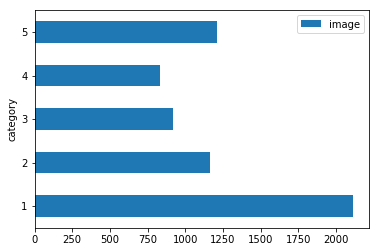

In [10]:
train_df.groupby('category').count().plot(kind='barh')

In [12]:
df_cat5=train_df.loc[train_df['category']==5];len(df_cat5)

1214

In [13]:
df_cat5.head()

,image,category
14,2896519.jpg,5
16,2845743.jpg,5
18,2839660.jpg,5
31,2896605.jpg,5
34,2816830.jpg,5


In [19]:
dup_img=[]
for i in range(len(df_cat5)):
    dup_img.append(df_cat5.image.iloc[i])

In [21]:
dup_img[:5]

['2896519.jpg', '2845743.jpg', '2839660.jpg', '2896605.jpg', '2816830.jpg']

In [22]:
path = f'{PATH}/train_resized/'
moveto = f'{PATH}/train_resized/'
#files = test_pos
#files.sort()
for f in dup_img:
    #print(str(f))
    src = path+f
    dst = moveto+'dup_'+f
   # print(f)
    shutil.copy(src,dst)

In [24]:
len(os.listdir(PATH/'train_resized'))

13720

In [25]:
df_cat5['image']=df_cat5.image.apply(lambda x: 'dup_'+x)

/anaconda/envs/fastai_v1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
new_train_df=pd.read_csv(PATH/'train_new.csv');new_train_df.tail()

,image,category
12481,gr_2881056.jpg,3
12482,gr_1145083.jpg,2
12483,gr_2898652.jpg,5
12484,gr_2868175.jpg,3
12485,gr_2784171.jpg,1


In [30]:
dup_new_train=pd.concat([new_train_df,df_cat5],0)

In [31]:
dup_new_train.tail()

,image,category
6208,dup_2835536.jpg,5
6213,dup_2816879.jpg,5
6221,dup_2890389.jpg,5
6233,dup_2829250.jpg,5
6240,dup_2898652.jpg,5


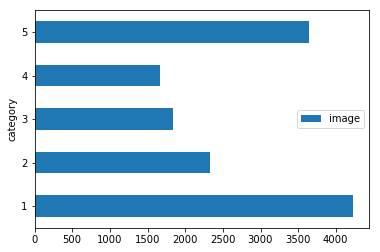

In [32]:
dup_new_train.groupby('category').count().plot(kind='barh')

In [33]:
dup_new_train.to_csv(PATH/'train_new_dup.csv',index=False)